In [1]:
# Import necessary libraries for data processing, plotting and caluclating R-squared, RMSE, and MAE
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
# Load the Red Wine Quality dataset
ds = pd.read_csv("D:\AI\AI for Decision Making - AIDI1005\winequality-red.csv")

In [3]:
# Exploring the dataset further by knowing its features and shape
print('Features:', ds.columns)
print('Shape of the dataset:', ds.shape)

Features: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')
Shape of the dataset: (1599, 12)


In [4]:
# getting the number of rows and columns
print("Rows, columns: " + str(ds.shape))
# getting the first five rows of the dataset
ds.head()

Rows, columns: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# Checking for the missing values
print(ds.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


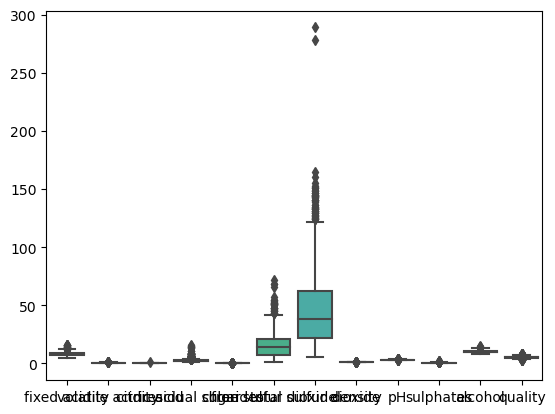

In [6]:
# Checking for outliers
sns.boxplot(data=ds)
plt.show()

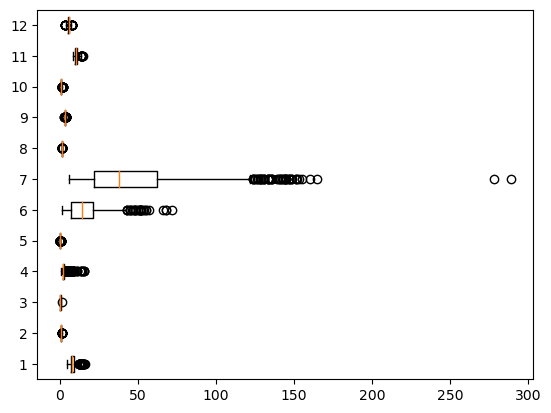

In [7]:
# Create the boxplot
fig, ax = plt.subplots()
box = ax.boxplot(ds.values, vert=False)

# Show the plot
plt.show()

In [8]:
from scipy import stats
z = np.abs(stats.zscore(ds))
print("Z-scores:", z)
threshold = 3
outliers = np.where(z > 3)
print("Outliers:", outliers)

ds_without_outliers = ds[(z < 3).all(axis=1)]
print("Data without outliers:", ds_without_outliers)

Z-scores:       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.528360          0.961877     1.391472        0.453218   0.243707   
1          0.298547          1.967442     1.391472        0.043416   0.223875   
2          0.298547          1.297065     1.186070        0.169427   0.096353   
3          1.654856          1.384443     1.484154        0.453218   0.264960   
4          0.528360          0.961877     1.391472        0.453218   0.243707   
...             ...               ...          ...             ...        ...   
1594       1.217796          0.403229     0.980669        0.382271   0.053845   
1595       1.390155          0.123905     0.877968        0.240375   0.541259   
1596       1.160343          0.099554     0.723916        0.169427   0.243707   
1597       1.390155          0.654620     0.775267        0.382271   0.264960   
1598       1.332702          1.216849     1.021999        0.752894   0.434990   

      free sulfur

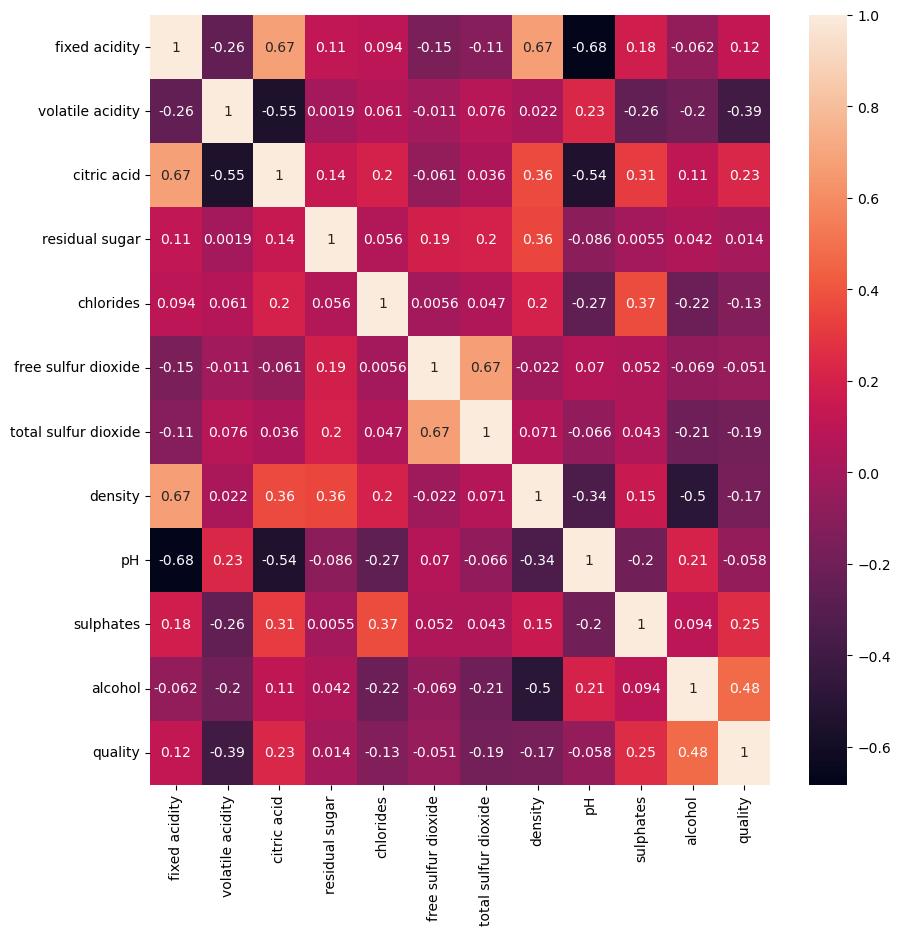

In [9]:
# Implementing Correlation heatmap
corr = ds.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)
plt.show()

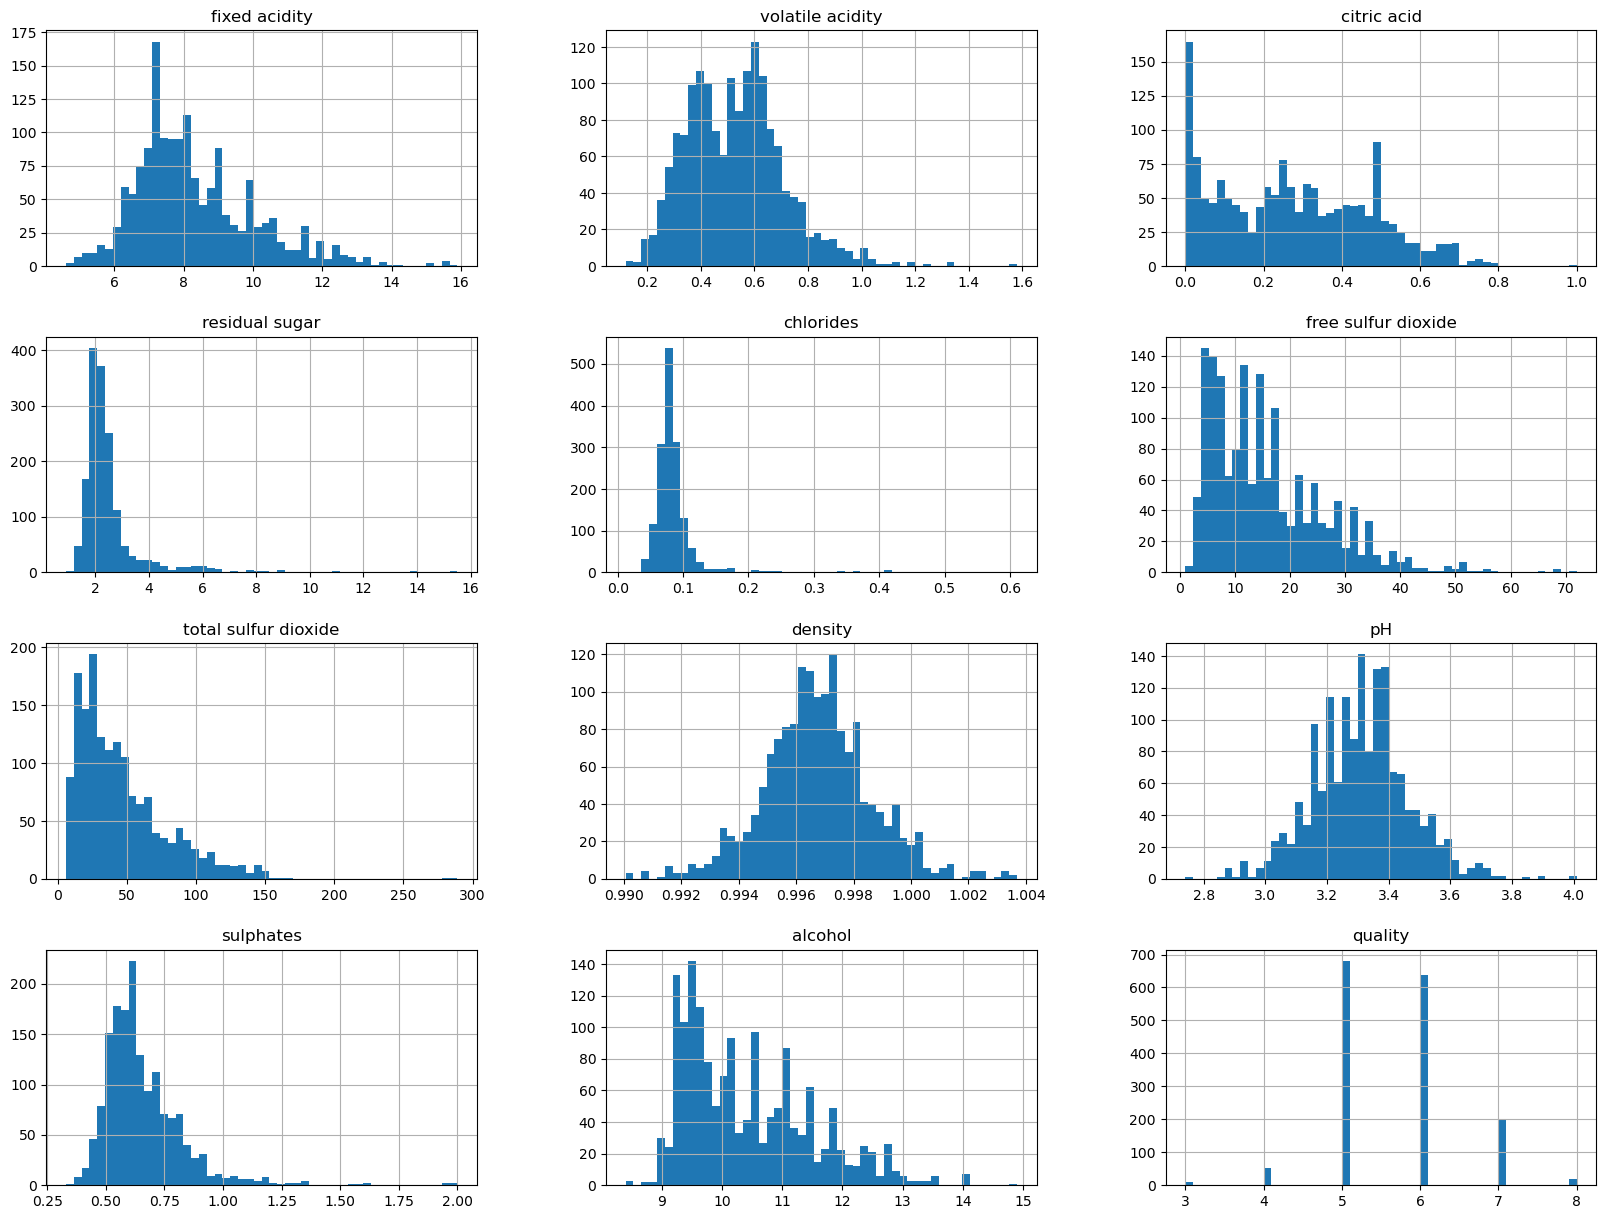

In [10]:
# Checking the distribution of data using histograms for all the features
ds.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
# split the data into features and target variables
X = ds.drop("quality", axis=1)
y = ds["quality"]

In [12]:
#importing libraries to perform normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# importing ridge and lasso regression model
from sklearn.linear_model import Ridge, Lasso
# fitting the ridge regression model
ridge = Ridge(alpha=0.5)
ridge.fit(X_train, y_train)

# making predictions using the ridge model
y_pred_ridge = ridge.predict(X_test)

In [15]:
#Caluclating R-squared, RMSE and MAE of ridge regression
r2_r1 = r2_score(y_test, y_pred_ridge)
Rmse1 = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
Mae1 = mean_absolute_error(y_test, y_pred_ridge)

In [16]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r1)
print("RMSE:", Rmse1)
print("MAE:", Mae1)

Ridge Model Metrics:
R-squared: 0.4005005246163439
RMSE: 0.6259204580898902
MAE: 0.504832281808021


In [17]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_ridge': ridge.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_ridge', inplace=True, ascending=False)
print(coefs)

                 feature  coef_ridge
9              sulphates    0.780635
10               alcohol    0.295082
0          fixed acidity    0.017295
5    free sulfur dioxide    0.005689
3         residual sugar    0.001320
6   total sulfur dioxide   -0.003601
7                density   -0.019131
2            citric acid   -0.159498
8                     pH   -0.405277
1       volatile acidity   -1.020639
4              chlorides   -1.464344


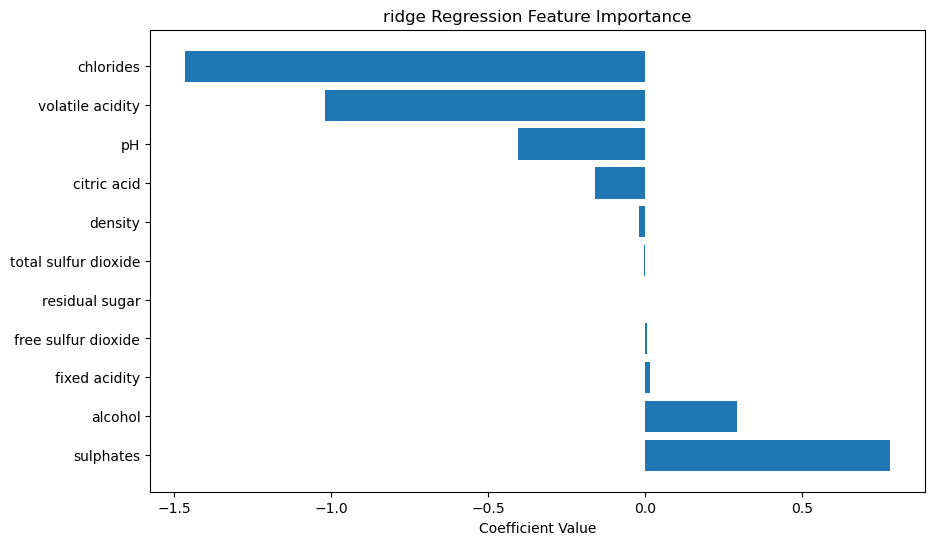

In [18]:
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_ridge'])
plt.title("ridge Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [19]:
# fitting the lasso regression model
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

# making the predictions using the lasso model
y_pred_lasso = lasso.predict(X_test)

In [20]:
#Caluclating R-squared, RMSE and MAE of Lasso model
r2_r2 = r2_score(y_test, y_pred_lasso)
Rmse2 = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
Mae2 = mean_absolute_error(y_test, y_pred_lasso)

In [21]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r2)
print("RMSE:", Rmse2)
print("MAE:", Mae2)

Ridge Model Metrics:
R-squared: 0.008385678868741087
RMSE: 0.8050004777013742
MAE: 0.6578965009112053


In [22]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_lasso': lasso.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_lasso', inplace=True, ascending=False)
print(coefs)

                 feature  coef_lasso
5    free sulfur dioxide    0.000722
0          fixed acidity    0.000000
1       volatile acidity   -0.000000
2            citric acid    0.000000
3         residual sugar    0.000000
4              chlorides   -0.000000
7                density   -0.000000
8                     pH   -0.000000
9              sulphates    0.000000
10               alcohol    0.000000
6   total sulfur dioxide   -0.004591


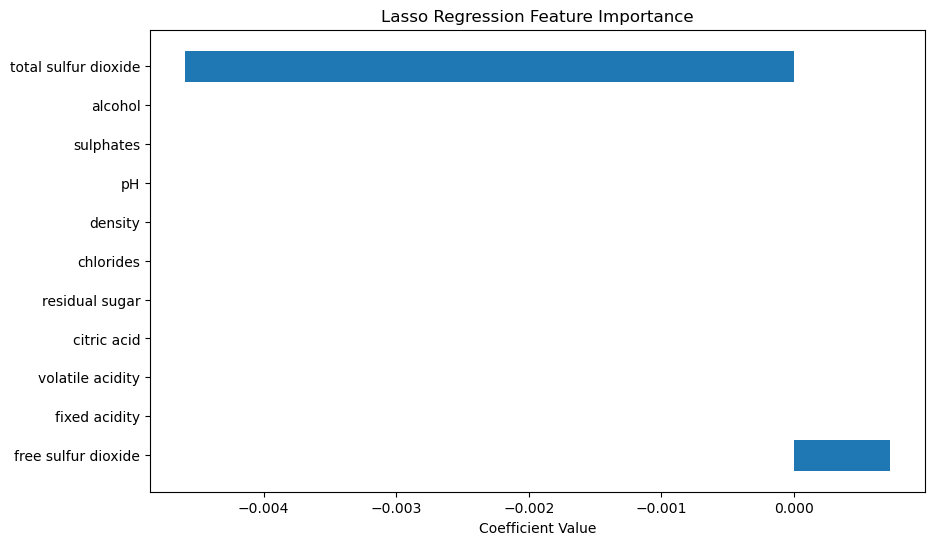

In [23]:
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_lasso'])
plt.title("Lasso Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
# Training a Linear Regression model
Linear = LinearRegression()
Linear.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = Linear.predict(X_test)

In [25]:
#Caluclating R-squared, RMSE and MAE of Linear regression
r2_r3 = r2_score(y_test, y_pred_linear)
Rmse3 = np.sqrt(mean_squared_error(y_test, y_pred_linear))
Mae3 = mean_absolute_error(y_test, y_pred_linear)

In [26]:
print("Ridge Model Metrics:")
print("R-squared:", r2_r3)
print("RMSE:", Rmse3)
print("MAE:", Mae3)

Ridge Model Metrics:
R-squared: 0.40318034127906854
RMSE: 0.6245199307983025
MAE: 0.5035304415524666


In [27]:
# Calculating the feature importance scores
coefs = pd.DataFrame({'feature': X.columns, 'coef_linear': Linear.coef_})

# Sorting the features by their coefficient values
coefs.sort_values('coef_linear', inplace=True, ascending=False)
print(coefs)

                 feature  coef_linear
9              sulphates     0.841172
10               alcohol     0.281890
0          fixed acidity     0.023085
3         residual sugar     0.006564
5    free sulfur dioxide     0.005627
6   total sulfur dioxide    -0.003644
2            citric acid    -0.140821
8                     pH    -0.393688
1       volatile acidity    -1.001304
4              chlorides    -1.806503
7                density   -10.351594


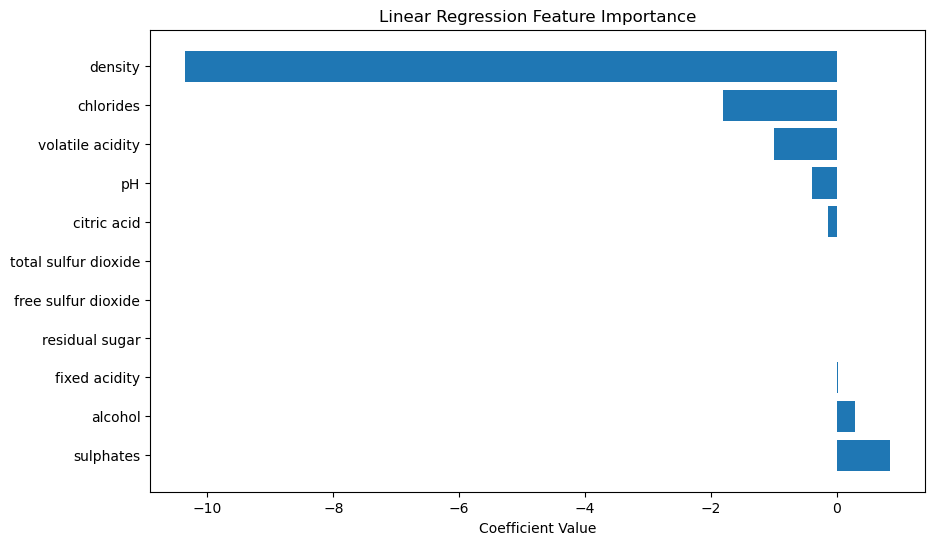

In [28]:
# Visualizing the feature importance scores
plt.figure(figsize=(10, 6))
plt.barh(coefs['feature'], coefs['coef_linear'])
plt.title("Linear Regression Feature Importance")
plt.xlabel("Coefficient Value")
plt.show()

In [29]:
#comparing R-squared (Coefficient of determination) and checking the performance of the three models

if r2_r1 > r2_r2 and r2_r1 > r2_r3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif r2_r2 > r2_r1 and r2_r2 > r2_r3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")

Linear Regression performs better than Lasso Regression and Ridge regression


In [30]:
#comparing the RMSE (Root Mean Squared Error) and checking the performance of the three models

if Rmse1 < Rmse2 and Rmse1 < Rmse3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif Rmse2 < Rmse1 and Rmse2 < Rmse3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")

Linear Regression performs better than Lasso Regression and Ridge regression


In [31]:
#comparing the MAE (Mean absolute error) and checking the performance of the three models

if Mae1 < Mae2 and Mae1 < Mae3:
    print("Ridge Regression performs better than Lasso Regression and Linear regression")
elif Mae2 < Mae1 and Mae2 < Mae3:
    print("Lasso Regression performs better than Ridge Regression and Linear regression")
else:
    print("Linear Regression performs better than Lasso Regression and Ridge regression")

Linear Regression performs better than Lasso Regression and Ridge regression


In [32]:
#Based on the above comparisions we can say that Linear regression model performs better with Lasso regression and Ridge regression